In [102]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
file_path = 'dataset.csv'
df = pd.read_csv(file_path)
df = df.drop(df.columns[-2:], axis=1)
df.head()

,date,channel_name,campaign_name,creative_id,device_type,cost_usd,impressions,clicks,signups,payments,ctr,cr(click-signup),cr(signup-payment)
0,12/6/2024,Google Search Engine,Awareness Female 35-44,Creative_32,Android,2.335280,719,38,3,1,5.29%,7.89%,33.33%
1,27/1/2024,YouTube,Remarketing Male 55+,Creative_12,iOS,4.703972,4166,15,1,1,0.36%,6.67%,100.00%
2,9/1/2024,Google Search Engine,Awareness Male 45-54,Creative_30,iOS,3.018451,1188,25,2,1,2.10%,8.00%,50.00%
3,7/1/2024,Instagram Stories,Remarketing Male 55+,Creative_54,Android,0.760292,1292,7,0,0,0.54%,0.00%,0.00%
4,30/5/2024,Google Search Engine,Branding Male 18-24,Creative_98,Desktop,1.167750,700,9,0,0,1.29%,0.00%,0.00%


In [93]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

percentage_columns = ['ctr', 'cr(click-signup)', 'cr(signup-payment)']
for column in percentage_columns:
    # Strip the '%' sign and convert to float
    df[column] = df[column].str.rstrip('%').astype(float)/100

df

,date,channel_name,campaign_name,creative_id,device_type,cost_usd,impressions,clicks,signups,payments,ctr,cr(click-signup),cr(signup-payment)
0,2024-06-12,Google Search Engine,Awareness Female 35-44,Creative_32,Android,2.335280,719,38,3,1,0.0529,0.0789,0.3333
1,2024-01-27,YouTube,Remarketing Male 55+,Creative_12,iOS,4.703972,4166,15,1,1,0.0036,0.0667,1.0000
2,2024-01-09,Google Search Engine,Awareness Male 45-54,Creative_30,iOS,3.018451,1188,25,2,1,0.0210,0.0800,0.5000
3,2024-01-07,Instagram Stories,Remarketing Male 55+,Creative_54,Android,0.760292,1292,7,0,0,0.0054,0.0000,0.0000
4,2024-05-30,Google Search Engine,Branding Male 18-24,Creative_98,Desktop,1.167750,700,9,0,0,0.0129,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2024-05-25,TikTok,Awareness Male 18-24,Creative_63,Android,1.454863,337,8,0,0,0.0237,0.0000,0.0000
4996,2024-02-09,Facebook News Feed,Prospecting Male 18-24,Creative_99,Android,2.272731,510,25,2,1,0.0490,0.0800,0.5000
4997,2024-02-29,Facebook News Feed,Prospecting Female 55+,Creative_95,Desktop,1.127258,140,6,0,0,0.0429,0.0000,0.0000
4998,2024-01-02,Instagram Stories,Awareness Female 55+,Creative_79,Android,0.611178,226,7,0,0,0.0310,0.0000,0.0000


In [94]:
df['month'] = df['date'].dt.to_period('M').astype(str)
df['week'] = df['date'].dt.to_period('W').astype(str)
df.head()

,date,channel_name,campaign_name,creative_id,device_type,cost_usd,impressions,clicks,signups,payments,ctr,cr(click-signup),cr(signup-payment),month,week
0,2024-06-12,Google Search Engine,Awareness Female 35-44,Creative_32,Android,2.335280,719,38,3,1,0.0529,0.0789,0.3333,2024-06,2024-06-10/2024-06-16
1,2024-01-27,YouTube,Remarketing Male 55+,Creative_12,iOS,4.703972,4166,15,1,1,0.0036,0.0667,1.0000,2024-01,2024-01-22/2024-01-28
2,2024-01-09,Google Search Engine,Awareness Male 45-54,Creative_30,iOS,3.018451,1188,25,2,1,0.0210,0.0800,0.5000,2024-01,2024-01-08/2024-01-14
3,2024-01-07,Instagram Stories,Remarketing Male 55+,Creative_54,Android,0.760292,1292,7,0,0,0.0054,0.0000,0.0000,2024-01,2024-01-01/2024-01-07
4,2024-05-30,Google Search Engine,Branding Male 18-24,Creative_98,Desktop,1.167750,700,9,0,0,0.0129,0.0000,0.0000,2024-05,2024-05-27/2024-06-02


In [95]:
monthly_data = df.groupby(['month'])[['cost_usd', 'impressions','clicks','signups','payments']].sum().reset_index()
monthly_data['CTR'] = (monthly_data['clicks'] / monthly_data['impressions'])
monthly_data

,month,cost_usd,impressions,clicks,signups,payments,CTR
0,2024-01,1857.841564,451850,13491,814,443,0.029857
1,2024-02,1650.149250,433722,12312,751,396,0.028387
2,2024-03,1784.520746,492146,12928,777,426,0.026269
3,2024-04,1668.297526,471883,11884,697,411,0.025184
4,2024-05,1801.255388,467362,13250,803,430,0.028351
5,2024-06,1649.393104,450760,12172,730,408,0.027003


In [110]:
df['month'] = df['date'].dt.to_period('M').astype(str)

df['week'] = df['date'].dt.to_period('W').astype(str)
weekly_data = df.groupby(['week'])[['cost_usd', 'impressions','clicks','signups','payments']].sum().reset_index()
# weekly_data = df.groupby(['week','channel_name'])[['cost_usd', 'impressions','clicks','signups','payments']].sum().reset_index()
weekly_data['CTR'] = (weekly_data['clicks'] / weekly_data['impressions'])
weekly_data['week_start'] = weekly_data['week'].str.split('/').str[0]
weekly_data.drop('week', axis=1, inplace=True)
weekly_data

,cost_usd,impressions,clicks,signups,payments,CTR,week_start
0,342.956140,82583,2615,158,88,0.031665,2024-01-01
1,420.282733,98286,3056,183,104,0.031093,2024-01-08
2,437.105143,120368,3128,184,101,0.025987,2024-01-15
3,403.326834,92425,2775,169,90,0.030024,2024-01-22
4,520.263806,133748,3768,230,114,0.028172,2024-01-29
5,387.147662,107798,2882,174,101,0.026735,2024-02-05
6,368.731173,93106,2858,176,86,0.030696,2024-02-12
7,410.334733,101498,3052,188,95,0.030070,2024-02-19
8,387.967491,108029,2914,176,103,0.026974,2024-02-26
9,400.217044,118521,2943,182,97,0.024831,2024-03-04


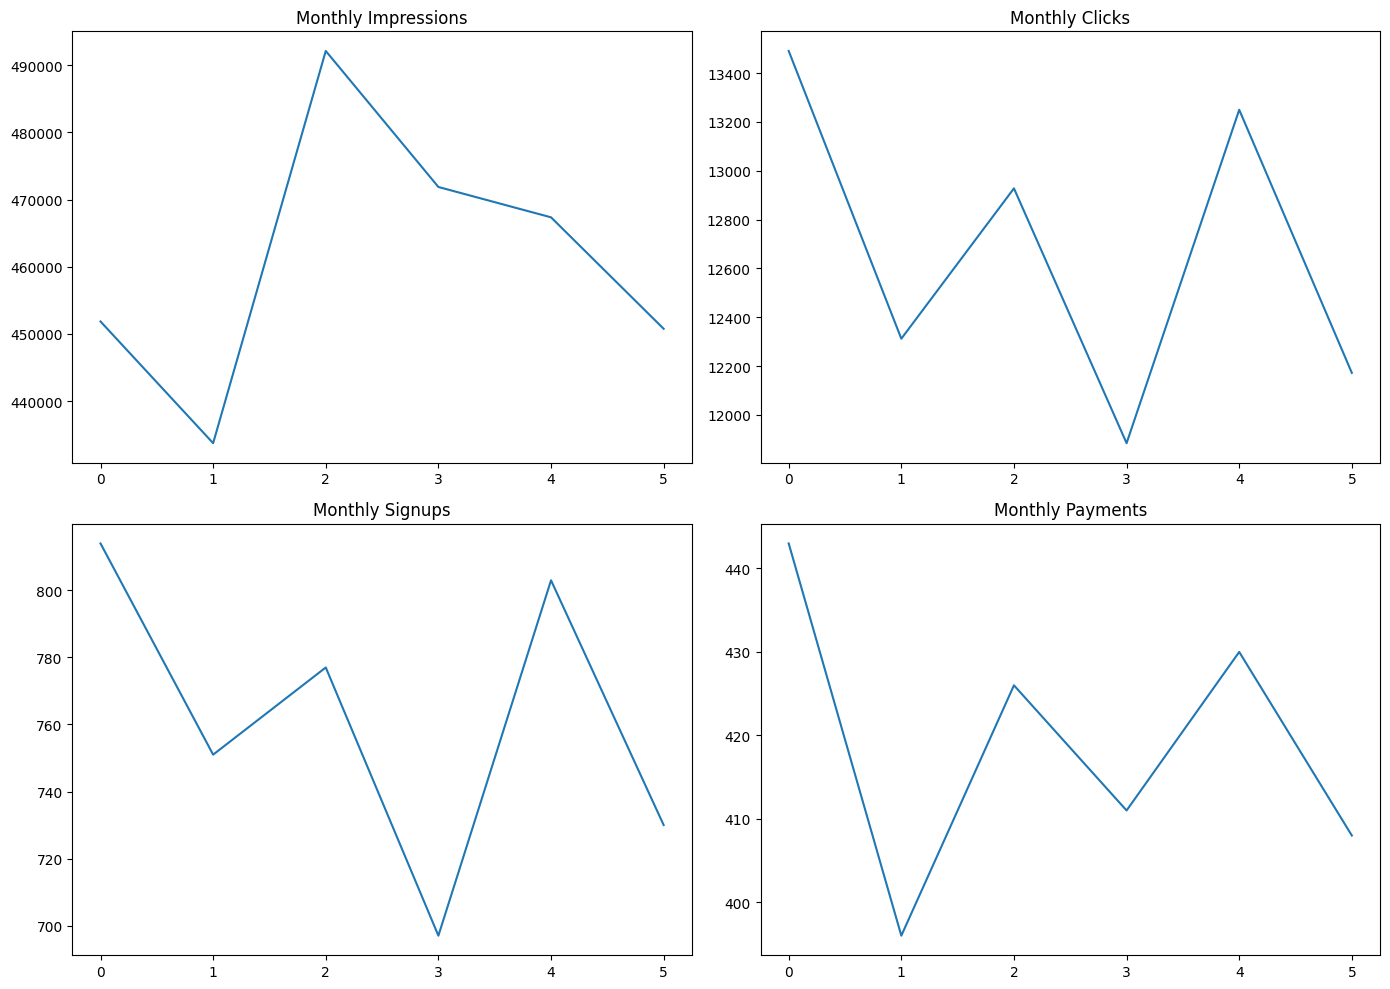

In [97]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(monthly_data.index, monthly_data['impressions'])
plt.title('Monthly Impressions')

plt.subplot(2, 2, 2)
plt.plot(monthly_data.index, monthly_data['clicks'])
plt.title('Monthly Clicks')

plt.subplot(2, 2, 3)
plt.plot(monthly_data.index, monthly_data['signups'])
plt.title('Monthly Signups')

plt.subplot(2, 2, 4)
plt.plot(monthly_data.index, monthly_data['payments'])
plt.title('Monthly Payments')

plt.tight_layout()
plt.show()

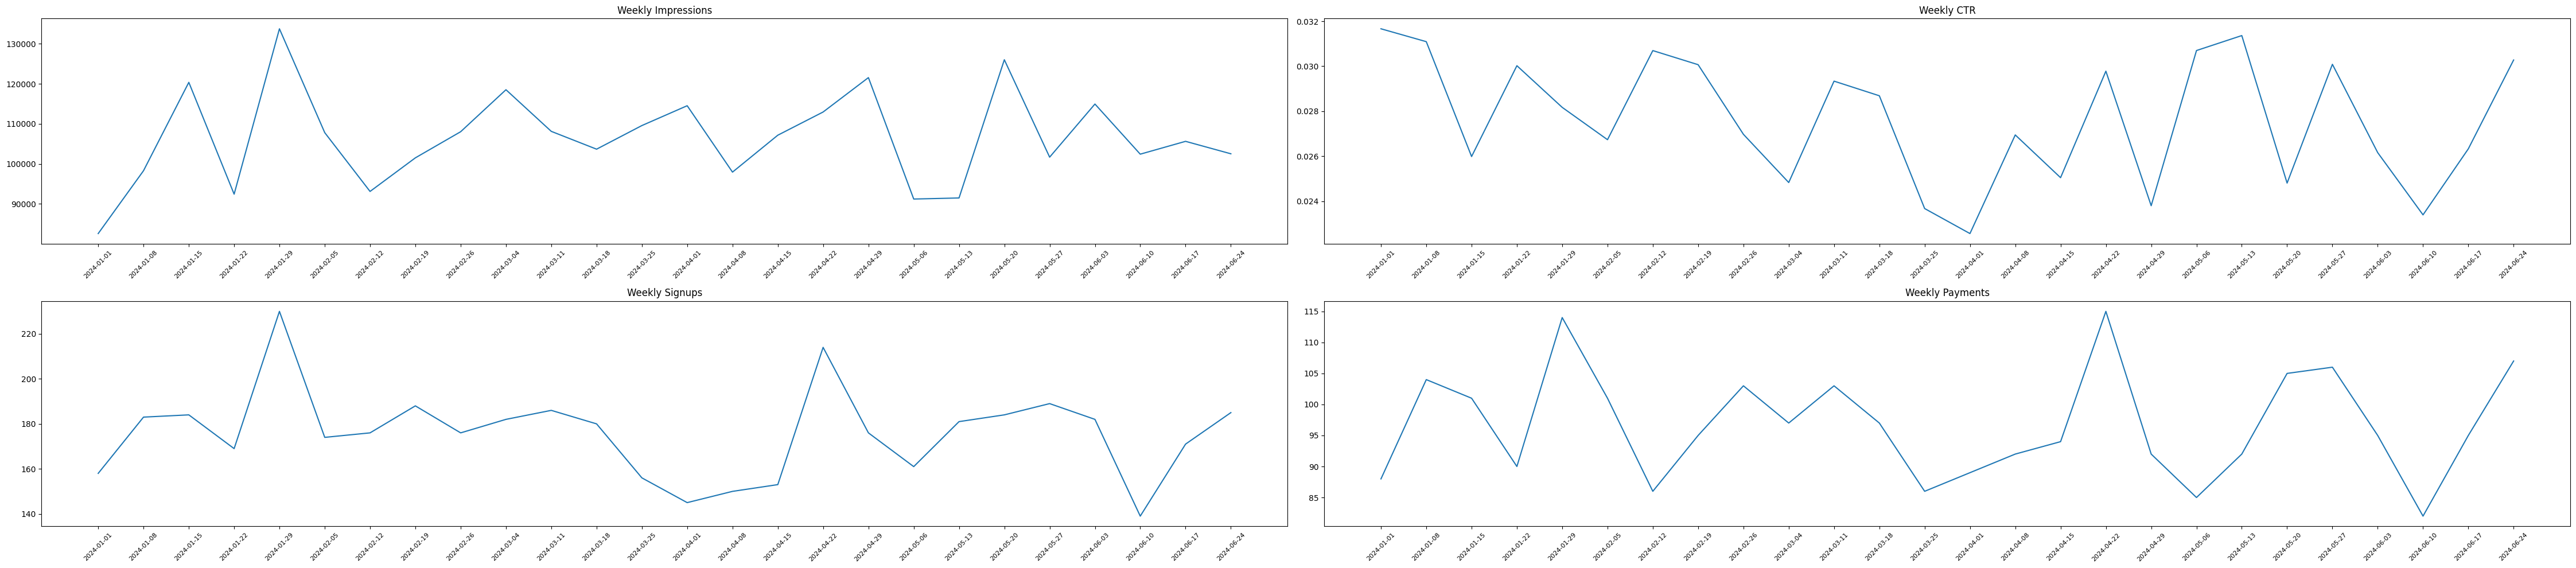

In [118]:
plt.figure(figsize=(45, 10))

plt.subplot(2, 2, 1)
plt.plot(weekly_data.week_start, weekly_data['impressions'])
plt.title('Weekly Impressions')
plt.xticks(rotation=45, fontsize=8) 
#plt.xticks(ticks=np.arange(len(weekly_data.index)), labels=np.arange(1, len(weekly_data.index) + 1))


plt.subplot(2, 2, 2)
plt.plot(weekly_data.week_start, weekly_data['CTR'])
plt.title('Weekly CTR')
plt.xticks(rotation=45, fontsize=8) 
#plt.xticks(ticks=np.arange(len(weekly_data.index)), labels=np.arange(1, len(weekly_data.index) + 1))


plt.subplot(2, 2, 3)
plt.plot(weekly_data.week_start, weekly_data['signups'])
plt.title('Weekly Signups')
plt.xticks(rotation=45, fontsize=8) 

plt.subplot(2, 2, 4)
plt.plot(weekly_data.week_start, weekly_data['payments'])
plt.title('Weekly Payments')
plt.xticks(rotation=45, fontsize=8) 

plt.tight_layout()
plt.show()

In [119]:
weekly_data_c = df.groupby(['week','channel_name'])[['cost_usd', 'impressions','clicks','signups','payments']].sum().reset_index()
weekly_data_c['CTR'] = (weekly_data_c['clicks'] / weekly_data_c['impressions'])
weekly_data_c['week_start'] = weekly_data_c['week'].str.split('/').str[0]
weekly_data_c.drop('week', axis=1, inplace=True)

weekly_data_c

,channel_name,cost_usd,impressions,clicks,signups,payments,CTR,week_start
0,Facebook News Feed,81.479470,16003,570,34,26,0.035618,2024-01-01
1,Google Search Engine,136.888541,31458,1449,108,46,0.046061,2024-01-01
2,Instagram Stories,40.708622,14772,241,6,6,0.016315,2024-01-01
3,MoPub,20.557709,4616,56,0,0,0.012132,2024-01-01
4,TikTok,9.890972,3088,30,0,0,0.009715,2024-01-01
...,...,...,...,...,...,...,...,...
151,Google Search Engine,188.476927,36895,1689,120,53,0.045779,2024-06-24
152,Instagram Stories,49.083506,12317,282,12,12,0.022895,2024-06-24
153,MoPub,19.289335,3452,48,0,0,0.013905,2024-06-24
154,TikTok,13.315918,9221,61,0,0,0.006615,2024-06-24


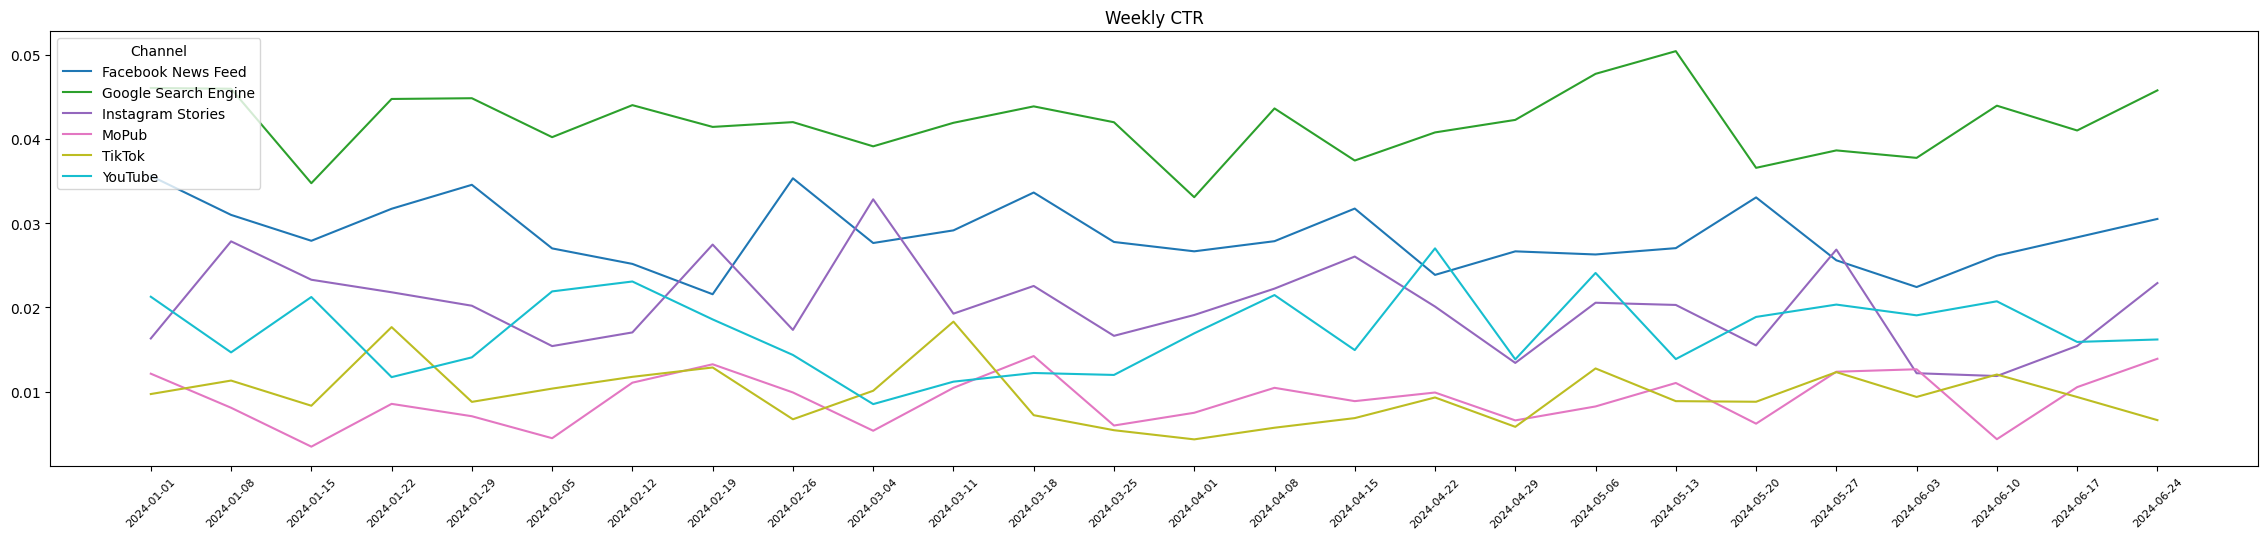

In [130]:
plt.figure(figsize=(45, 10))
plt.subplot(2, 2, 1)

# Get unique channels
channels = weekly_data_c['channel_name'].unique()

# Define a color palette
colors = plt.cm.get_cmap('tab10', len(channels))

# Plot each channel with a different color
for i, channel in enumerate(channels):
    channel_data = weekly_data_c[weekly_data_c['channel_name'] == channel]
    plt.plot(channel_data['week_start'], channel_data['CTR'], label=channel, color=colors(i))

plt.title('Weekly CTR')
plt.xticks(rotation=45, fontsize=8) 
plt.legend(title='Channel',loc='upper left')  # Add a legend to differentiate channels
plt.tight_layout()
plt.show()

In [128]:

weekly_changes = weekly_data_c.pivot(index='week_start', columns='channel_name', values='CTR').pct_change() * 100
correlation_matrix = weekly_changes.corr()
correlation_matrix


channel_name,Facebook News Feed,Google Search Engine,Instagram Stories,MoPub,TikTok,YouTube
channel_name,,,,,,
Facebook News Feed,1.000000,0.109233,-0.323757,-0.008576,-0.251120,-0.256185
Google Search Engine,0.109233,1.000000,0.076500,0.434622,0.414165,-0.103750
Instagram Stories,-0.323757,0.076500,1.000000,0.163096,0.262129,-0.184014
MoPub,-0.008576,0.434622,0.163096,1.000000,0.325627,-0.095678
TikTok,-0.251120,0.414165,0.262129,0.325627,1.000000,0.201462
YouTube,-0.256185,-0.103750,-0.184014,-0.095678,0.201462,1.000000


In [85]:
df.set_index('date', inplace=True)
df.sort_index(inplace=True)
weekly = df.resample('W').agg({
    'impressions': 'sum',
    'clicks': 'sum',
    'signups': 'sum',
    'payments': 'sum'
})



In [49]:
fig_monthly = px.line(monthly_data, x='month', y=['CTR'],
                      title='Monthly Trends in Campaign Performance',
                      labels={'value': 'Count', 'month': 'Month'})
fig_monthly.update_layout(title_x=0.5)
fig_monthly.show()



In [50]:
fig_monthly = px.line(monthly_data, x='month', y=['payments'],
                      title='Monthly Trends in Campaign Performance',
                      labels={'value': 'Count', 'month': 'Month'})
fig_monthly.update_layout(title_x=0.5)
fig_monthly.show()

In [51]:
fig_weekly = px.line(weekly_data, x='week', y=['CTR'],
                     title='Weekly Trends in Campaign Performance',
                     labels={'value': 'Count', 'week': 'Week'})
fig_weekly.update_layout(title_x=0.5)
fig_weekly.show()

In [38]:
fig_weekly = px.line(weekly_data, x='week', y=['clicks'],
                     title='Weekly Trends in Campaign Performance',
                     labels={'value': 'Count', 'week': 'Week'})
fig_weekly.update_layout(title_x=0.5)
fig_weekly.show()

In [41]:
fig_weekly = px.line(weekly_data, x='week', y=['payments'],
                     title='Weekly Trends in Campaign Performance',
                     labels={'value': 'Count', 'week': 'Week'})
fig_weekly.update_layout(title_x=0.5)
fig_weekly.show()

In [45]:
monthly_corr = monthly_data[['impressions', 'clicks', 'signups','payments']].corr()
monthly_corr

,impressions,clicks,signups,payments
impressions,1.000000,0.161013,0.038050,0.415842
clicks,0.161013,1.000000,0.982910,0.870937
signups,0.038050,0.982910,1.000000,0.767322
payments,0.415842,0.870937,0.767322,1.000000


In [46]:
weekly_corr = weekly_data[['impressions', 'clicks', 'signups','payments']].corr()
weekly_corr

,impressions,clicks,signups,payments
impressions,1.000000,0.532126,0.449714,0.508118
clicks,0.532126,1.000000,0.968764,0.862845
signups,0.449714,0.968764,1.000000,0.828523
payments,0.508118,0.862845,0.828523,1.000000
